## Pyber Data Analysis
1. There are more drivers and total rides in the urban and suburban city type than in the rural city type.
2. Drivers in the rural city type charge higher average fare compare to other drivers in the urban and suburban city type.
3. The 3 pie charts show the same trends:
 - Urban city type has the highest percentage of total fares (62.7%) follow by suburban (30.5%) and rural (6.8%) city type.
 - Urban city type has the highest percentage of total rides (68.4%) follow by suburban (26.3%) and rural (5.3%) city type.
 - Urban city type has the most percentage of total drivers (80.9%) follow by suburban (16.5%) and rural (2.6%) city type.


In [1]:
# Magic command in Python
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "Data/city_data.csv"
ride_data = "Data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
combine_df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
combine_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


## Bubble Plot of Ride Sharing Data

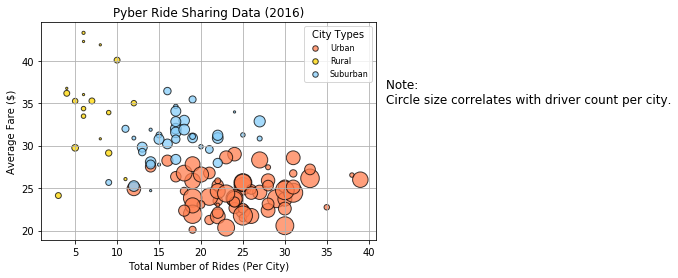

In [8]:
# Set up data frame by city typeand and group by city
urban_city_type = combine_df[combine_df["type"] == "Urban"].groupby([combine_df["city"]])
rural_city_type = combine_df[combine_df["type"] == "Rural"].groupby([combine_df["city"]])
suburban_city_type = combine_df[combine_df["type"] == "Suburban"].groupby([combine_df["city"]])

# For city type Urban: calculate total number of rides (x), average fare (y), and total number of drivers (d)
x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
d_urban = urban_city_type["driver_count"].mean()

# For city type Rural: calculate total number of rides (x), average fare (y), and total number of drivers (d)
x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
d_rural = rural_city_type["driver_count"].mean()

# For city type Suburban: calculate total number of rides (x), average fare (y), and total number of drivers (d)
x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
d_suburban = suburban_city_type["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=d_urban * 5, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=d_rural * 5, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=d_suburban  * 5, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Graph label 
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Display legend information
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Size the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Display a note about circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 12)

# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("images/PyberRideSharingData.png", bbox_inches="tight")


## Total Fares by City Type

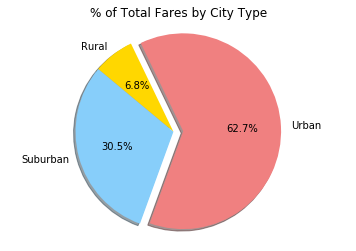

In [4]:
# calculate total fare and fare by city type
total_fares = combine_df["fare"].sum()
urban_fare = combine_df.loc[combine_df["type"] == "Urban", "fare"].sum()
rural_fare = combine_df.loc[combine_df["type"] == "Rural", "fare"].sum()
suburban_fare = combine_df.loc[combine_df["type"] == "Suburban", "fare"].sum()

# calculate percentage fare by city type
percent_urban = round(urban_fare/total_fares, 3) *100
percent_rural = round(rural_fare/total_fares, 3) *100
percent_suburban = round(suburban_fare/total_fares, 3) *100

# build pie chart
labels = "Urban", "Rural", "Suburban"
sizes = [percent_urban, percent_rural, percent_suburban]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% of Total Fares by City Type")

# Save pie chart to images folder
plt.savefig("images/TotalFaresbyCityType.png")

# show pie chart
plt.show()

## Total Rides by City Type

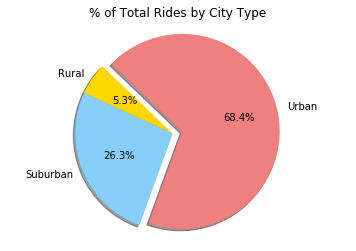

In [5]:
# calculate total rides and rides by city type
final_total_rides = len(combine_df)
urban_rides = round(combine_df.loc[combine_df["type"] == "Urban", "ride_id"].count()/final_total_rides, 3) * 100
rural_rides = round(combine_df.loc[combine_df["type"] == "Rural", "ride_id"].count()/final_total_rides, 3) * 100
suburban_rides = round(combine_df.loc[combine_df["type"] == "Suburban", "ride_id"].count()/final_total_rides, 3) * 100

# build pie chart
labels = "Urban", "Rural", "Suburban"
sizes = [urban_rides, rural_rides, suburban_rides]
explode = (0.1, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal')  
plt.title("% of Total Rides by City Type")

# save pie chart to images folder
plt.savefig("images/TotalRidesbyCityType.png")

# show pie chart
plt.show()



## Total Drivers by City Type

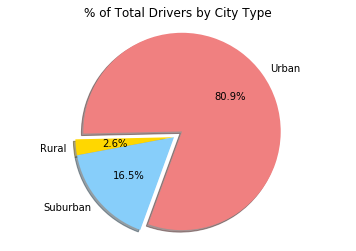

In [6]:
# Create Data Frame with total number of drivers per city and city type
city_type_df = combine_df.loc[:, ["city", "type", "driver_count"]]

# delete duplicates 
city_type_df= city_type_df.drop_duplicates()

# calculate total drivers and drivers by city type
total_drivers = city_type_df["driver_count"].sum()
urban_drivers = round(city_type_df.loc[city_type_df["type"] == "Urban", "driver_count"].sum()/total_drivers, 3)* 100
rural_drivers = round(city_type_df.loc[city_type_df["type"] == "Rural", "driver_count"].sum()/total_drivers, 3)* 100
suburban_drivers = round(city_type_df.loc[city_type_df["type"] == "Suburban", "driver_count"].sum()/total_drivers, 3)* 100

# build pie chart
labels = "Urban", "Rural", "Suburban"
sizes = [urban_drivers, rural_drivers, suburban_drivers]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal')  
plt.title("% of Total Drivers by City Type")

# save pie chart to images folder
plt.savefig("images/TotalDriversbyCityType.png")

# show pie chart
plt.show()